### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business Goal:

Build a regression model using Advance regression methods like Ridge and Lasso regression to predict the price of the houses with the available independent variables.

This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


### Model Objective:

1. Which variables are significant in predicting the price of a house
2. How well those variables describe the price of a house.
3. Determine the optimal value of lambda for ridge and lasso regression.


### Tasks:

#### Data Understanding, Data preparation and EDA: 

        Importing and understanding of the data
        Check the data quality, missing values if any, removing of duplicates and outlier analysis
        Create dummy variables or label encoding and derive new metrics
        Transformation of the target variables
        
#### Model Building and Evaluation:
    
        Test-train split and Feature scaling
        Data modelling using RFE
        Ridge and Lasso Regression to find the top feature variables and finding the optimal alpha value


### Steps:

1. Importing libraries
2. Ignoring warnings
3. Data Understanding and Preparation
4. Data Exploration
5. Data Preprocessing
6. Data Modeling
7. Model Building and Selection
8. Inferences or Recommendations

In [791]:
# Importing libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import KFold
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)

### Data Understanding and Preparation

In [792]:
# load or read the data from CSV file
house_data = pd.read_csv("train.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [793]:
#get shape of dataframe (no. of rows and columns)
house_data.shape

(1460, 81)

In [794]:
# get info of all the data and its relevant types

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [795]:
#get the summary of the numerical columns in the dataframe

house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [796]:
# Get the list of columns:

house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [797]:
#check if any null columns exists in the data
house_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Note: MasVnrType has 2 values 'NA' and 'None'. These 2 values are considered as NULL by the data frame and hence getting the values around 872.

In [798]:
null = pd.DataFrame(round(house_data.isnull().sum()/len(house_data.index)*100,2).sort_values(ascending=False),columns=["Null %"])
null.index.name = 'Features'
null.head()

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73


In [799]:
# complete dataframe with features having null values
null_df = null[null["Null %"] > 0]
null_df

,Null %
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55


Clearly, first 6 variables have highest % of missing values (near 50%). Hence, lets drop all of these 6 columns (PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu)

Also ID column does not give any information, so dropping the same

In [800]:
#Drop columns with maximum missing values

house_data = house_data.drop(columns=['Id', 'PoolQC','MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu'])

In [801]:
house_data.shape

(1460, 74)

In [802]:
#check missing values again
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

### Impute Remaining Missing Values

#### Imputing numerical variables

In [803]:
#check unique values of LotFrontage
house_data.LotFrontage.value_counts()

LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
130.0      3


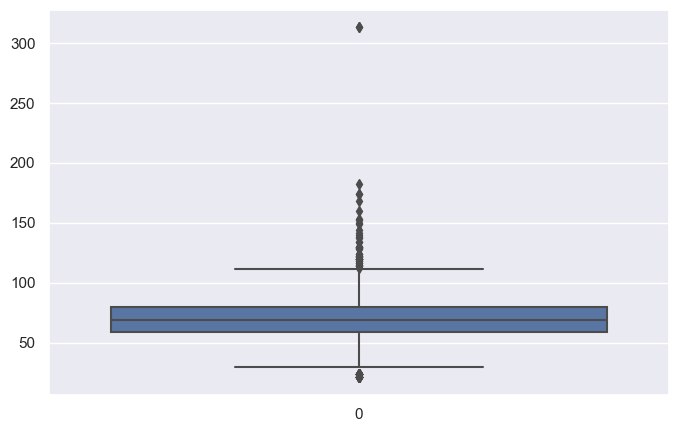

In [804]:
# Chek if any outliers in the column "LotFrontage"
sns.boxplot(house_data.LotFrontage)
plt.show()

In [805]:
# As it shows some outliers lets calculate median of LotFrontage and replace this value
LotFrontage_median = house_data.LotFrontage.median()
LotFrontage_median

69.0

In [806]:
#impute missing values of LotFrontage with median value as this column shows some outliers in the data
house_data.LotFrontage = house_data.LotFrontage.fillna(LotFrontage_median)

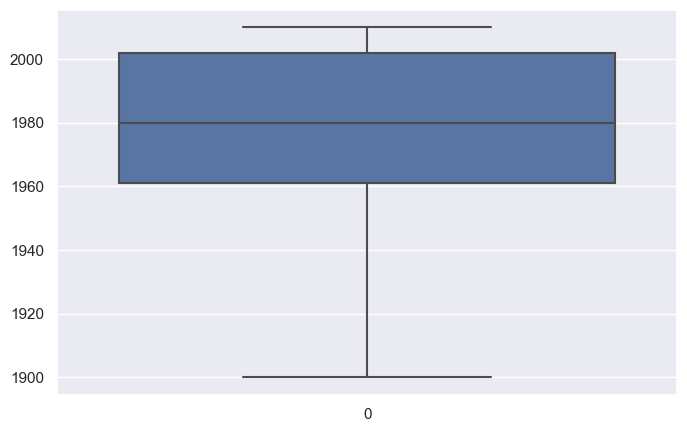

In [807]:
# Outlier analysis of GarageYrBlt

sns.boxplot(house_data.GarageYrBlt)
plt.show()

In [808]:
# There are no outliers, so imputing missing values with mean

house_data['GarageYrBlt'].fillna(house_data['GarageYrBlt'].mean(),inplace=True)

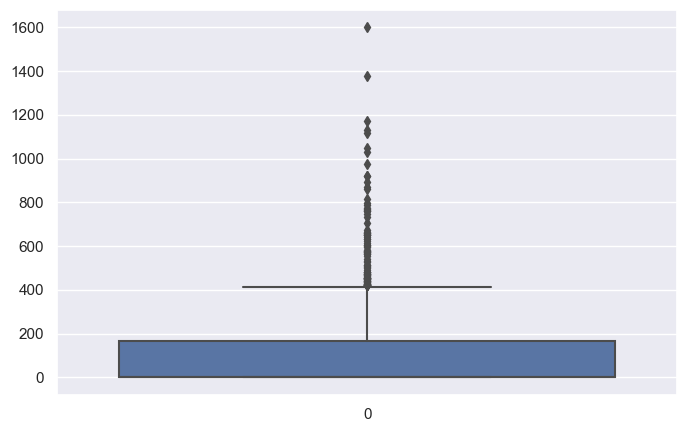

In [809]:
# Outlier analysis of MasVnrArea

sns.boxplot(house_data.MasVnrArea)
plt.show()

In [810]:
#impute missing values of MasVnrArea with median value as this column shows some outliers in the data
house_data.MasVnrArea = house_data.MasVnrArea.fillna(house_data.MasVnrArea.median())    

#### Impute Categorical value

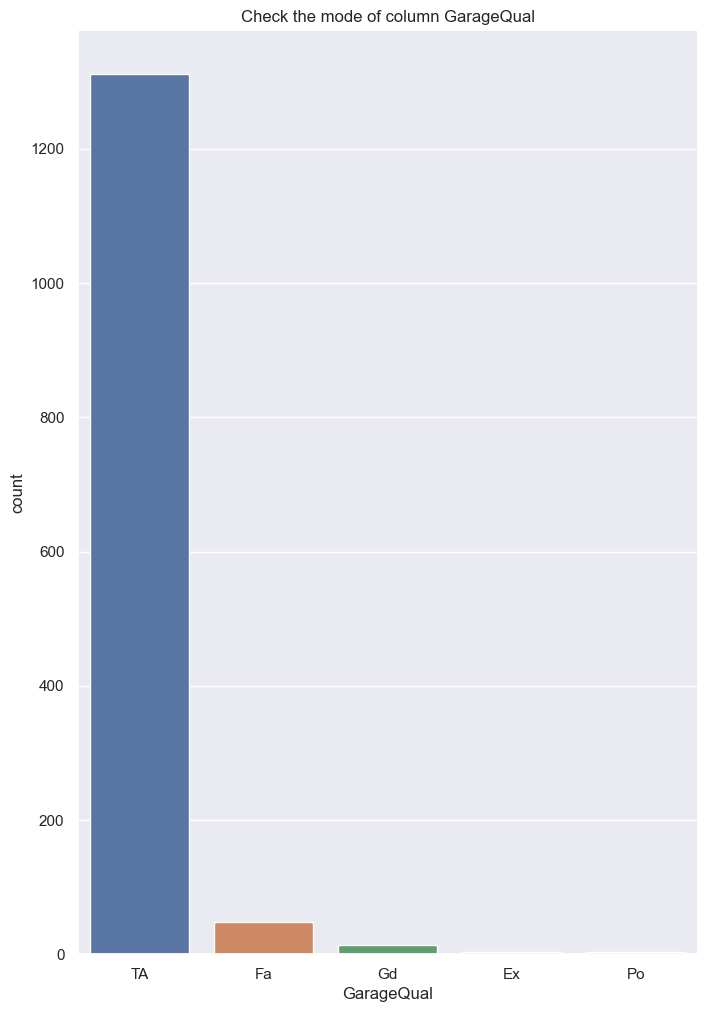

In [811]:
# As this categorical column, lets check for mode of these columns
# Data imputation for column 'GarageQual'

plt.figure(figsize=(8,12))
sns.countplot(house_data, x = 'GarageQual')
plt.title("Check the mode of column GarageQual")
plt.show()

In [812]:
house_data.GarageQual.value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [813]:
# Most of the values are 'TA', so we can map the missing values of 'GarageQual' to 'TA'
house_data['GarageQual'] = house_data['GarageQual'].replace(np.nan,'TA')

In [814]:
house_data.GarageQual.value_counts()

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

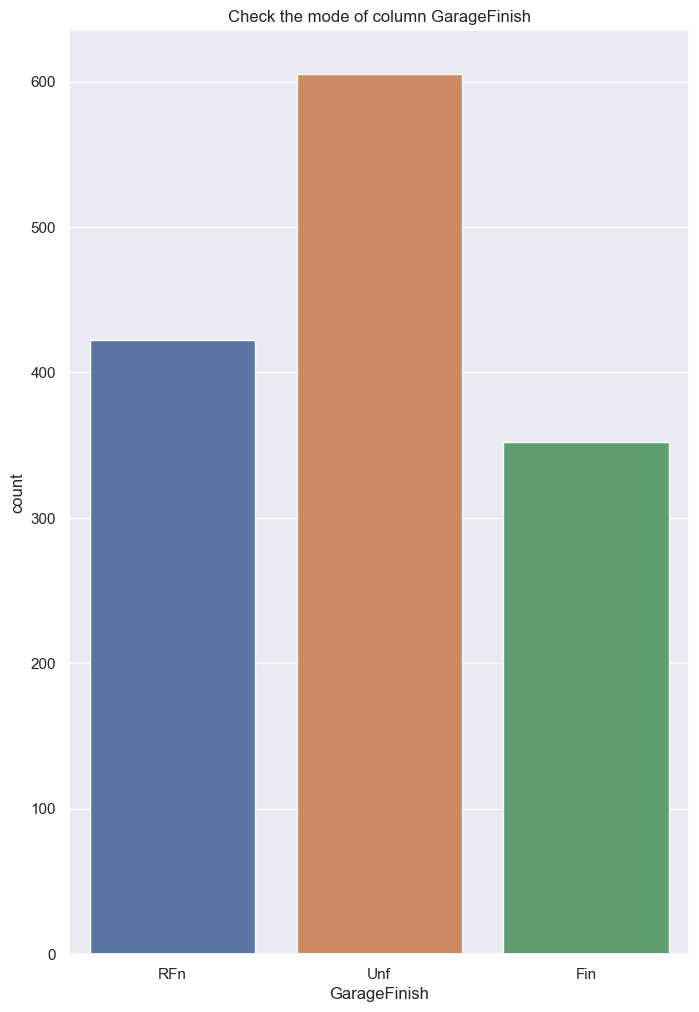

In [815]:
# Data imputation for column 'GarageFinish'

plt.figure(figsize=(8,12))
sns.countplot(house_data, x = 'GarageFinish')
plt.title("Check the mode of column GarageFinish")
plt.show()

In [816]:
house_data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

When compared to above data of GarageQual, this column 'GarageFinish' has almost similarly distributed data, so we cannot replace it with any one of the available data. Instead, we would replace it with NA i.e. No Garage as per data dict.

In [817]:
#replace missing values of GarageFinish with NA i.e. No Garage

house_data.GarageFinish = house_data.GarageFinish.fillna('NA')

In [818]:
house_data.GarageFinish.value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
NA      81
Name: count, dtype: int64

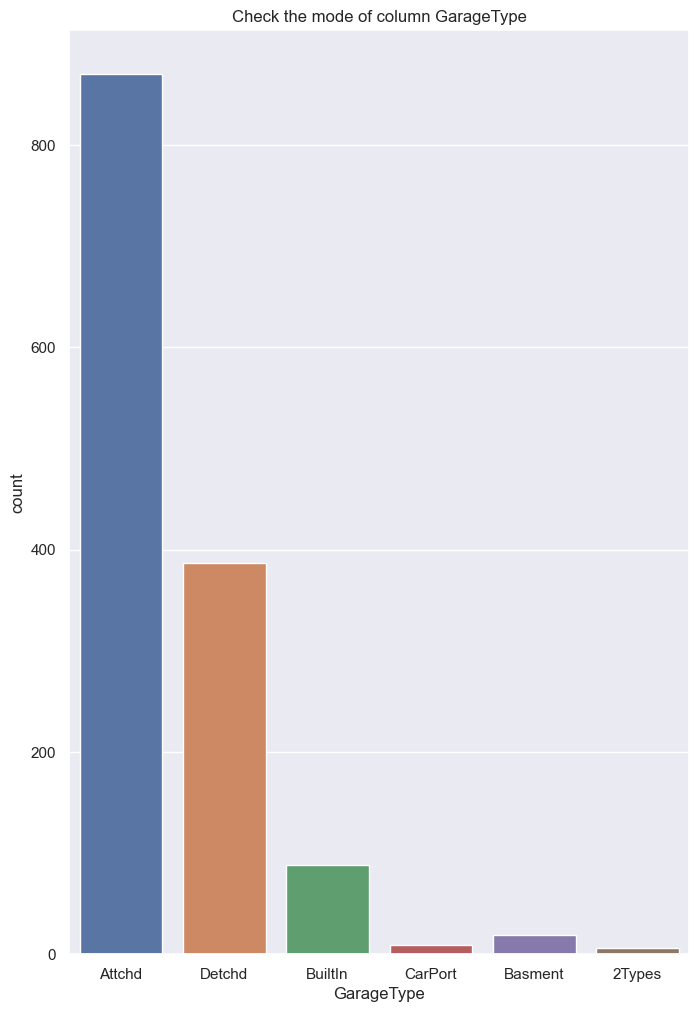

In [819]:
# Data imputation for column 'GarageType'

plt.figure(figsize=(8,12))
sns.countplot(house_data, x = 'GarageType')
plt.title("Check the mode of column GarageType")
plt.show()

In [820]:
house_data.GarageType.value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [821]:
# Most of the values are 'ATTCHD' , so we can map the missing values of 'GarageType' to ATTCHD (MODE)

house_data['GarageType'] = house_data['GarageType'].replace(np.nan,'Attchd')

In [822]:
house_data.GarageType.value_counts()

GarageType
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

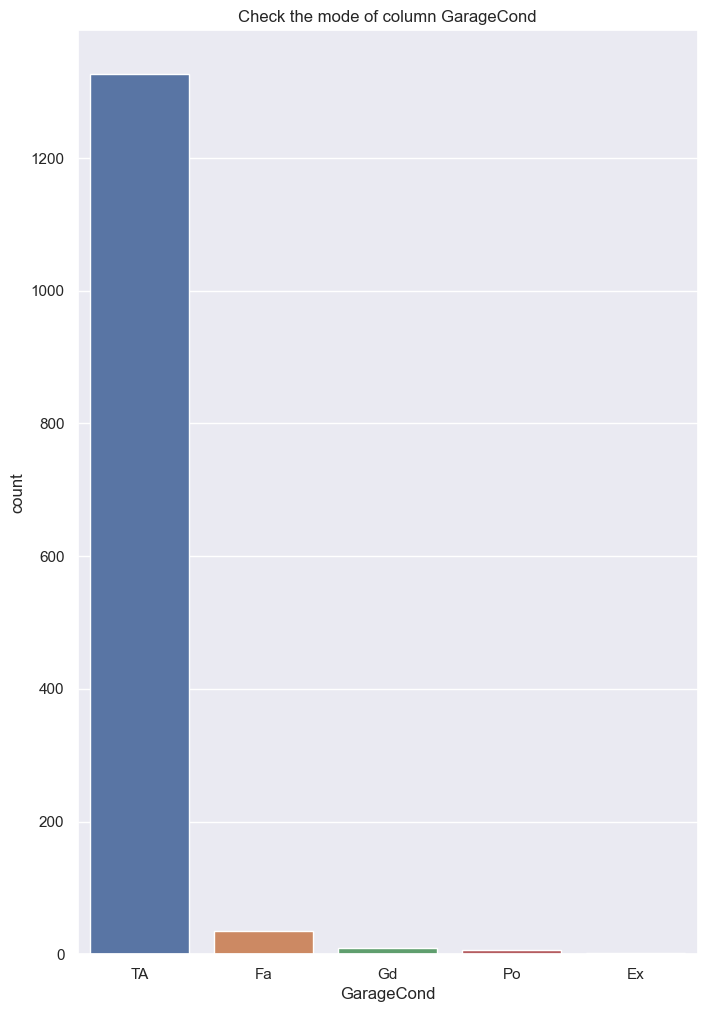

In [823]:
# Data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(house_data, x = 'GarageCond')
plt.title("Check the mode of column GarageCond")
plt.show()

In [824]:
house_data.GarageCond.value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [825]:
# Most of the values is 'TA' , so we can map the missing values of 'GarageCond' to TA -MODE

house_data['GarageCond'] = house_data['GarageCond'].replace(np.nan,'TA')

In [826]:
house_data.GarageCond.value_counts()

GarageCond
TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

Others columns related to Basement and electrical, have very less NaN values, so lets replace them with 'NA' or 'NO' as per data dict.

In [827]:
#replace missing values of BsmtQual with NA i.e. "No Basement"
house_data.BsmtQual = house_data.BsmtQual.fillna('NA')

In [828]:
#replace missing values of BsmtCond with NA i.e. No Basement
house_data.BsmtCond = house_data.BsmtCond.fillna('NA')

In [829]:
#replace missing values of BsmtExposure with No i.e. No Exposure
house_data.BsmtExposure = house_data.BsmtExposure.fillna('No')

In [830]:
#replace missing values of BsmtFinType1 with NA i.e. No Basement
house_data.BsmtFinType1 = house_data.BsmtFinType1.fillna('NA')

In [831]:
#replace missing values of BsmtFinType2 with NA i.e. No Basement
house_data.BsmtFinType2 = house_data.BsmtFinType2.fillna('NA')

In [832]:
#replace missing values of Electrical with 'mode' as it is a categorical column
house_data.Electrical = house_data.Electrical.fillna(house_data.Electrical.mode()[0])    

In [833]:
#check missing values again
house_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

#### All the missing values are handled

### Data Exploration

In [834]:
house_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
   

In [835]:
# Let us start with year columns from above
# There are Year built and Year sold
# Finding the difference between these 2 years can give us how old the house is or age of the house
# Lets calculate the age of the house and eliminate the pther 2 year columns

house_data['AgeofHouse'] = house_data.YrSold - house_data.YearBuilt

In [836]:
#Drop YrSold, YearBuilt after AgeofHouse

house_data=house_data.drop(columns=['YrSold', 'YearBuilt'])

In [837]:
house_data.shape

(1460, 73)

In [838]:
house_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,AgeofHouse
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,180921.195890,36.547945
std,42.300571,22.027677,9981.264932,1.382997,1.112799,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,79442.502883,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,129975.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,163000.000000,35.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,214000.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,755000.000000,136.000000


As per my understanding, YearRemodAdd and MoSold columns can also be removed as the related data can be handled by the new column "AgeofHouse", hence dropping

In [839]:
house_data=house_data.drop(columns=['YearRemodAdd', 'MoSold'])

In [840]:
house_data.shape

(1460, 71)

In [841]:
house_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeofHouse
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,36.547945
std,42.300571,22.027677,9981.264932,1.382997,1.112799,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.250152
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,136.000000


In [842]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [843]:
for c in house_data.columns:
    if house_data[c].dtype == "object" :
        print(c)
        print(house_data[c].value_counts(normalize=True))

MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
Street
Street
Pave    0.99589
Grvl    0.00411
Name: proportion, dtype: float64
LotShape
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: proportion, dtype: float64
LandContour
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: proportion, dtype: float64
Utilities
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: proportion, dtype: float64
LotConfig
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: proportion, dtype: float64
LandSlope
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: proportion, dtype: float64
Neighborhood
Neighborhood
NAmes      0.154110
CollgCr    0.102740
OldTown    0.077397
Edwards    0.068493
Somerst    0.058904
Gilbert    0.054110
NridgHt    0.052740
Sawyer     0.050685
NWA

In [844]:
#Drop columns which have more than 80% bias data
house_data=house_data.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope','Condition1', 'Condition2', 'BldgType',
                                    'RoofMatl', 'BsmtCond', 'ExterCond', 'BsmtFinType2',
                                    'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive',  'SaleType'
                                    , 'SaleCondition'])

In [845]:
house_data.shape

(1460, 51)

In [846]:
#Get all object type columns
object_columns = []
for c in house_data.columns:
    if house_data[c].dtype == "object":
        object_columns.append(c)
print(object_columns)

['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish']


In [847]:
#Get all numeric type columns
numeric_columns = []
for c in house_data.columns:
    if house_data[c].dtype != "object":
        numeric_columns.append(c)
print(numeric_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeofHouse']


### Create Dummy variables

In [848]:
# Convert categorical value into Dummy variable
house_data=pd.get_dummies(house_data,dtype = int,drop_first=True)
house_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,65.0,8450,7,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,208500,5,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,181500,31,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,223500,7,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,140000,91,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,60,84.0,14260,8,5,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,250000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [849]:
house_data.shape

(1460, 146)

In [850]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 146 entries, MSSubClass to GarageFinish_Unf
dtypes: float64(3), int32(112), int64(31)
memory usage: 1.0 MB


### Data modelling

### Splitting the data into train and test sets

In [851]:
#Split the data into train and test

y = house_data.pop('SalePrice')
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [852]:
X = house_data
X.shape

(1460, 145)

In [853]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=100)

In [854]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (438, 145)
X_test shape (1022, 145)
y_train shape (438,)
y_test shape (1022,)


### Scaling of numeric variables

In [855]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1084,60,69.0,13031,6,5,0.0,592,0,99,691,691,807,0,1498,0,0,2,1,3,1,6,1,1995.0,2,409,315,44,0,0,0,0,0,11,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
112,60,77.0,9965,7,5,220.0,984,0,280,1264,1282,1414,0,2696,1,0,2,1,4,1,10,1,2007.0,3,792,120,184,0,0,168,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
518,60,69.0,9531,6,5,0.0,706,0,88,794,882,914,0,1796,1,0,2,1,3,1,7,0,1998.0,2,546,0,36,0,0,0,0,0,9,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
297,60,66.0,7399,7,5,1600.0,649,0,326,975,975,975,0,1950,0,0,2,1,3,1,7,1,1997.0,2,576,0,10,0,0,198,0,0,10,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
338,20,91.0,14145,7,7,0.0,213,0,995,1208,1621,0,0,1621,1,0,2,0,3,1,8,0,1984.0,2,440,108,45,0,0,0,0,400,22,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0


In [856]:
y_train.head()

1084    187500
112     383970
518     211000
297     239000
338     202500
Name: SalePrice, dtype: int64

In [857]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,20,60.0,9000,4,6,0.0,616,0,248,864,864,0,0,864,0,0,1,0,3,1,5,0,1974.0,2,528,0,0,0,0,0,0,0,36,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
57,60,89.0,11645,7,5,0.0,0,0,860,860,860,860,0,1720,0,0,2,1,3,1,7,0,2004.0,2,565,0,70,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
780,20,63.0,7875,7,5,38.0,0,0,1237,1237,1253,0,0,1253,0,0,2,0,3,1,6,1,1995.0,2,402,220,21,0,0,0,0,0,12,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
382,60,79.0,9245,7,5,0.0,0,0,939,939,939,858,0,1797,0,0,2,1,3,1,8,0,2006.0,2,639,144,53,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1170,80,76.0,9880,6,6,0.0,522,0,574,1096,1118,0,0,1118,1,0,1,0,3,1,6,1,1977.0,1,358,203,0,0,0,0,576,0,31,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0


In [858]:
y_test.head()

1436    120500
57      196500
780     176000
382     213500
1170    171000
Name: SalePrice, dtype: int64

In [859]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,55.684932,69.310502,10840.164384,6.130137,5.563927,115.650685,443.262557,45.913242,572.573059

In [860]:
# Create list of numeric variables

num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
            'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
            'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'AgeofHouse']

X_train[num_vars].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse
1084,60,69.0,13031,6,5,0.0,592,0,99,691,691,807,0,1498,0,0,2,1,3,1,6,1,1995.0,2,409,315,44,0,0,0,0,0,11
112,60,77.0,9965,7,5,220.0,984,0,280,1264,1282,1414,0,2696,1,0,2,1,4,1,10,1,2007.0,3,792,120,184,0,0,168,0,0,0
518,60,69.0,9531,6,5,0.0,706,0,88,794,882,914,0,1796,1,0,2,1,3,1,7,0,1998.0,2,546,0,36,0,0,0,0,0,9
297,60,66.0,7399,7,5,1600.0,649,0,326,975,975,975,0,1950,0,0,2,1,3,1,7,1,1997.0,2,576,0,10,0,0,198,0,0,10
338,20,91.0,14145,7,7,0.0,213,0,995,1208,1621,0,0,1621,1,0,2,0,3,1,8,0,1984.0,2,440,108,45,0,0,0,0,400,22


In [861]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,55.684932,69.310502,10840.164384,6.130137,5.563927,115.650685,443.262557,45.913242,572.573059

In [862]:
#Scaling using MinMax

scaler=MinMaxScaler()

In [863]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [864]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1084,0.235294,0.372093,0.053801,0.555556,0.50,0.0000,0.261947,0.0,0.045982,0.215533,0.115329,0.431090,0.0,0.250118,0.000000,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.5,0.871560,0.50,0.388783,0.367561,0.084130,0.0,0.0,0.000000,0.0,0.000000,0.085938,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
112,0.235294,0.434109,0.039455,0.666667,0.50,0.1375,0.435398,0.0,0.130051,0.394261,0.328995,0.755342,0.0,0.532798,0.333333,0.0,0.666667,0.5,0.666667,0.0,0.777778,0.5,0.981651,0.75,0.752852,0.140023,0.351816,0.0,0.0,0.538462,0.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
518,0.235294,0.372093,0.037424,0.555556,0.50,0.0000,0.312389,0.0,0.040873,0.247661,0.184382,0.488248,0.0,0.320434,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.0,0.899083,0.50,0.519011,0.000000,0.068834,0.0,0.0,0.000000,0.0,0.000000,0.070312,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
297,0.235294,0.348837,0.027448,0.666667,0.50,1.0000,0.287168,0.0,0.151417,0.304117,0.218004,0.520833,0.0,0.356772,0.000000,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.5,0.889908,0.50,0.547529,0.000000,0.019120,0.0,0.0,0.634615,0.0,0.000000,0.078

In [865]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,0.000000,0.302326,0.034940,0.333333,0.625,0.00000,0.272566,0.0,0.115188,0.269495,0.177874,0.000000,0.0,0.100519,0.000000,0.0,0.333333,0.0,0.5,0.0,0.222222,0.0,0.678899,0.50,0.501901,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.281250,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
57,0.235294,0.527132,0.047316,0.666667,0.500,0.00000,0.000000,0.0,0.399443,0.268247,0.176428,0.459402,0.0,0.302501,0.000000,0.0,0.666667,0.5,0.5,0.0,0.444444,0.0,0.954128,0.50,0.537072,0.000000,0.133843,0.0,0.0,0.0,0.0,0.0,0.015625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
780,0.000000,0.325581,0.029675,0.666667,0.500,0.02375,0.000000,0.0,0.574547,0.385839,0.318510,0.000000,0.0,0.192308,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.5,0.871560,0.50,0.382129,0.256709,0.040153,0.0,0.0,0.0,0.0,0.0,0.093750,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
382,0.235294,0.449612,0.036086,0.666667,0.500,0.00000,0.000000,0.0,0.436136,0.292888,0.204989,0.458333,0.0,0.320670,0.000000,0.0,0.666667,0.5,0.5,0.0,0.555556,0.0,0.972477,0.50,0.607414,0.168028,0.101338,0.0,0.0,0.0,0.0,0.0,0.007812,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [866]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.00000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.00000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.0,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,0.209911,0.374500,0.043550,0.570015,0.570491,0.072282,0.196134,0.040994,0.265942,0.331176,0.288

In [867]:
X_train.shape

(438, 145)

### Model Building and Evaluation

### RFE - Recursive Feature Elimination

Take Top 25 Features from RFE

In [868]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=25)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [869]:
#Find the top features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 118),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 9),
 ('BsmtFinSF2', False, 24),
 ('BsmtUnfSF', False, 8),
 ('TotalBsmtSF', False, 21),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', False, 22),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 104),
 ('FullBath', True, 1),
 ('HalfBath', False, 83),
 ('BedroomAbvGr', False, 3),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 2),
 ('Fireplaces', False, 41),
 ('GarageYrBlt', False, 29),
 ('GarageCars', False, 45),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 14),
 ('OpenPorchSF', False, 49),
 ('EnclosedPorch', False, 97),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 15),
 ('PoolArea', False, 25),
 ('MiscVal', False, 101),
 ('AgeofHouse', True, 1),
 ('MSZoning_FV', False, 17),
 ('MSZoning_RH', False, 20),
 ('MSZoning_RL', False, 18),
 ('MSZoning

In [870]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageArea', 'AgeofHouse', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'HouseStyle_2.5Fin', 'RoofStyle_Shed', 'Exterior2nd_CmentBd', 'BsmtQual_Gd', 'BsmtQual_NA', 'BsmtQual_TA', 'BsmtExposure_Gd', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA'], dtype='object')

In [871]:
#skipped columns check
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'HeatingQC_Po', 'HeatingQC_TA', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_NA', 'GarageFinish_RFn', 'GarageFinish_Unf'], dtype='object', length=120)

In [872]:
#Model with RFE selected columns
X_train_rfe = X_train[col]

In [873]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [874]:
#create a RFE model using OLS
lm = sm.OLS(y_train,X_train_rfe).fit()  #Running the linear Model

In [875]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     109.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          8.55e-165
Time:                        17:41:08   Log-Likelihood:                -5115.8
No. Observations:                 438   AIC:                         1.028e+04
Df Residuals:                     412   BIC:                         1.039e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  8.06e+04   1.59e+04      5.085      0.000    4.94e+04    1.12e+05
MSSubClass           -2.822e+04   7692.730     -3.669      0.000   -4.33e+04   -1.31e+04
LotArea                1.17e+05    2.8e+04      4.180      0.000     6.2e+04    1.72e+05
OverallQual           1.074e+05   1.73e+04      6.212      0.000    7.34e+04    1.41e+05
OverallCond           5.083e+04   1.16e+04      4.372      0.000     2.8e+04    7.37e+04
MasVnrArea            3.898e+04   1.35e+04      2.885      0.004    1.24e+04    6.55e+04
1stFlrSF               1.16e+05   1.73e+04      6.701      0.000     8.2e+04     1.5e+05
2ndFlrSF              6.528e+04   9159.191      7.127      0.000    4.73e+04    8.33e+04
BsmtFullBath          3.091e+04   8966.370      3.447      0.001    1.33e+04    4.85e+04
FullBath              3.906e+04   1.17e+04      3.344      0.001    1.61e+04     6.2e+04
KitchenAbvGr          -3.72e+04   1.55e+04     -2.404      0.017   -6.76e+04   -6783.186
GarageArea            4.892e+04   1.07e+04      4.573      0.000    2.79e+04    6.99e+04
AgeofHouse           -4.948e+04   1.06e+04     -4.652      0.000   -7.04e+04   -2.86e+04
Neighborhood_MeadowV  3.901e+04    1.9e+04      2.051      0.041    1619.927    7.64e+04
Neighborhood_NoRidge  7.132e+04   9582.307      7.443      0.000    5.25e+04    9.02e+04
Neighborhood_StoneBr  3.373e+04   1.38e+04      2.440      0.015    6554.370    6.09e+04
HouseStyle_2.5Fin     4.711e+04   3.28e+04      1.437      0.151   -1.73e+04    1.12e+05
RoofStyle_Shed        3.234e+04    3.1e+04      1.045      0.297   -2.85e+04    9.32e+04
Exterior2nd_CmentBd  -2.731e+04   9710.639     -2.812      0.005   -4.64e+04   -8220.362
BsmtQual_Gd           -4.26e+04   6109.286     -6.972      0.000   -5.46e+04   -3.06e+04
BsmtQual_NA          -4.429e+04   1.07e+04     -4.136      0.000   -6.53e+04   -2.32e+04
BsmtQual_TA          -4.303e+04   6679.022     -6.442      0.000   -5.62e+04   -2.99e+04
BsmtExposure_Gd       2.768e+04   5786.394      4.783      0.000    1.63e+04    3.91e+04
KitchenQual_Fa       -3.613e+04    1.2e+04     -3.001      0.003   -5.98e+04   -1.25e+04
KitchenQual_Gd       -3.299e+04   7284.927     -4.528      0.000   -4.73e+04   -1.87e+04
KitchenQual_TA       -3.811e+04   8200.590     -4.647      0.000   -5.42e+04    -2.2e+04
==============================================================================
Omnibus:                      300.111   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31319.589
Skew:                          -2.039   Prob(JB):                         0.00
Kurtosis:                      44.225   Cond. No.                         42.7
==============================================================================

Notes:
[1] Standard Errors 

In [876]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,126.61
25,KitchenQual_TA,8.44
24,KitchenQual_Gd,6.59
21,BsmtQual_TA,5.52
19,BsmtQual_Gd,4.64
3,OverallQual,3.66
12,AgeofHouse,3.04
6,1stFlrSF,2.83
9,FullBath,2.52
7,2ndFlrSF,2.39


In [877]:
# KitchenQual_TA has higher p-value. Lets drop it.

X_train_new = X_train_rfe.drop(['KitchenQual_TA'],axis=1)

In [878]:
# Rebuild the model without KitchenQual_TA

X_train_lm = sm.add_constant(X_train_new)

In [879]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [880]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          2.77e-161
Time:                        17:41:11   Log-Likelihood:                -5127.0
No. Observations:                 438   AIC:                         1.030e+04
Df Residuals:                     413   BIC:                         1.041e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.363e+04    1.4e+04      3.106      0.002     1.6e+04    7.12e+04
MSSubClass           -2.749e+04   7880.559     -3.489      0.001    -4.3e+04    -1.2e+04
LotArea               1.085e+05   2.86e+04      3.793      0.000    5.23e+04    1.65e+05
OverallQual           1.265e+05   1.72e+04      7.353      0.000    9.27e+04     1.6e+05
OverallCond           5.246e+04   1.19e+04      4.406      0.000    2.91e+04    7.59e+04
MasVnrArea            4.129e+04   1.38e+04      2.985      0.003    1.41e+04    6.85e+04
1stFlrSF              1.199e+05   1.77e+04      6.769      0.000    8.51e+04    1.55e+05
2ndFlrSF              6.656e+04   9380.543      7.096      0.000    4.81e+04     8.5e+04
BsmtFullBath          3.137e+04   9186.641      3.415      0.001    1.33e+04    4.94e+04
FullBath              3.732e+04    1.2e+04      3.120      0.002    1.38e+04    6.08e+04
KitchenAbvGr         -4.132e+04   1.58e+04     -2.610      0.009   -7.24e+04   -1.02e+04
GarageArea            5.256e+04   1.09e+04      4.808      0.000    3.11e+04     7.4e+04
AgeofHouse           -5.582e+04   1.08e+04     -5.164      0.000   -7.71e+04   -3.46e+04
Neighborhood_MeadowV  3.141e+04   1.94e+04      1.618      0.106   -6754.172    6.96e+04
Neighborhood_NoRidge  6.801e+04   9791.104      6.946      0.000    4.88e+04    8.73e+04
Neighborhood_StoneBr  2.998e+04   1.41e+04      2.120      0.035    2177.690    5.78e+04
HouseStyle_2.5Fin      4.42e+04   3.36e+04      1.317      0.189   -2.18e+04     1.1e+05
RoofStyle_Shed        3.227e+04   3.17e+04      1.017      0.310   -3.01e+04    9.46e+04
Exterior2nd_CmentBd  -2.054e+04   9837.303     -2.088      0.037   -3.99e+04   -1204.499
BsmtQual_Gd          -5.028e+04   6026.451     -8.342      0.000   -6.21e+04   -3.84e+04
BsmtQual_NA          -5.015e+04   1.09e+04     -4.602      0.000   -7.16e+04   -2.87e+04
BsmtQual_TA          -5.112e+04   6606.887     -7.737      0.000   -6.41e+04   -3.81e+04
BsmtExposure_Gd        2.79e+04   5928.714      4.706      0.000    1.62e+04    3.96e+04
KitchenQual_Fa        1931.1694   9040.824      0.214      0.831   -1.58e+04    1.97e+04
KitchenQual_Gd       -3752.8081   3763.709     -0.997      0.319   -1.12e+04    3645.608
==============================================================================
Omnibus:                      258.122   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25539.709
Skew:                          -1.577   Prob(JB):                         0.00
Kurtosis:                      40.276   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [881]:
# KitchenQual_Fa  has higher p-value. Lets drop it.
X_train_new = X_train_rfe.drop(['KitchenQual_Fa'],axis=1)

In [882]:
# Rebuild the model without KitchenQual_TA

X_train_lm = sm.add_constant(X_train_new)

In [883]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [884]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     111.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          6.63e-164
Time:                        17:41:14   Log-Likelihood:                -5120.5
No. Observations:                 438   AIC:                         1.029e+04
Df Residuals:                     413   BIC:                         1.039e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.969e+04   1.44e+04      4.152      0.000    3.14e+04    8.79e+04
MSSubClass           -2.835e+04   7766.833     -3.650      0.000   -4.36e+04   -1.31e+04
LotArea               1.138e+05   2.82e+04      4.029      0.000    5.83e+04    1.69e+05
OverallQual           1.186e+05    1.7e+04      6.960      0.000    8.51e+04    1.52e+05
OverallCond           5.335e+04   1.17e+04      4.557      0.000    3.03e+04    7.64e+04
MasVnrArea            3.952e+04   1.36e+04      2.898      0.004    1.27e+04    6.63e+04
1stFlrSF              1.177e+05   1.75e+04      6.735      0.000    8.33e+04    1.52e+05
2ndFlrSF               6.52e+04   9247.512      7.050      0.000     4.7e+04    8.34e+04
BsmtFullBath          3.104e+04   9052.756      3.429      0.001    1.32e+04    4.88e+04
FullBath               3.97e+04   1.18e+04      3.367      0.001    1.65e+04    6.29e+04
KitchenAbvGr         -4.042e+04   1.56e+04     -2.593      0.010   -7.11e+04   -9780.162
GarageArea            5.168e+04   1.08e+04      4.804      0.000    3.05e+04    7.28e+04
AgeofHouse           -5.463e+04   1.06e+04     -5.154      0.000   -7.55e+04   -3.38e+04
Neighborhood_MeadowV  3.776e+04   1.92e+04      1.967      0.050      23.052    7.55e+04
Neighborhood_NoRidge  6.965e+04   9658.335      7.211      0.000    5.07e+04    8.86e+04
Neighborhood_StoneBr  3.209e+04   1.39e+04      2.301      0.022    4674.215    5.95e+04
HouseStyle_2.5Fin     4.621e+04   3.31e+04      1.396      0.163   -1.88e+04    1.11e+05
RoofStyle_Shed        3.344e+04   3.13e+04      1.070      0.285    -2.8e+04    9.49e+04
Exterior2nd_CmentBd   -2.47e+04   9765.055     -2.530      0.012   -4.39e+04   -5507.710
BsmtQual_Gd            -4.5e+04   6114.996     -7.359      0.000    -5.7e+04    -3.3e+04
BsmtQual_NA          -4.758e+04   1.08e+04     -4.423      0.000   -6.87e+04   -2.64e+04
BsmtQual_TA          -4.485e+04   6715.571     -6.678      0.000   -5.81e+04   -3.16e+04
BsmtExposure_Gd       2.739e+04   5841.390      4.688      0.000    1.59e+04    3.89e+04
KitchenQual_Gd       -2.014e+04   5950.954     -3.384      0.001   -3.18e+04   -8440.431
KitchenQual_TA       -2.136e+04   6068.061     -3.521      0.000   -3.33e+04   -9435.576
==============================================================================
Omnibus:                      282.532   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28519.767
Skew:                          -1.845   Prob(JB):                         0.00
Kurtosis:                      42.359   Cond. No.                         42.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [885]:
X_train_new.shape

(438, 25)

In [886]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,102.15
21,BsmtQual_TA,5.48
19,BsmtQual_Gd,4.56
24,KitchenQual_TA,4.53
23,KitchenQual_Gd,4.31
3,OverallQual,3.49
12,AgeofHouse,2.96
6,1stFlrSF,2.82
9,FullBath,2.51
7,2ndFlrSF,2.39


In [887]:
# BsmtQual_TA has higher VIF. Lets drop it.
X_train_new = X_train_new.drop(['BsmtQual_TA'],axis=1)

In [888]:
X_train_lm = sm.add_constant(X_train_new)

In [889]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [890]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.6
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          8.44e-156
Time:                        17:41:17   Log-Likelihood:                -5143.0
No. Observations:                 438   AIC:                         1.033e+04
Df Residuals:                     414   BIC:                         1.043e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.384e+04    1.4e+04      1.701      0.090   -3716.566    5.14e+04
MSSubClass           -2.497e+04   8148.296     -3.065      0.002    -4.1e+04   -8956.244
LotArea               1.145e+05   2.97e+04      3.859      0.000    5.62e+04    1.73e+05
OverallQual           1.344e+05   1.77e+04      7.571      0.000    9.95e+04    1.69e+05
OverallCond           4.503e+04   1.22e+04      3.679      0.000     2.1e+04    6.91e+04
MasVnrArea            4.059e+04   1.43e+04      2.831      0.005    1.24e+04    6.88e+04
1stFlrSF               1.19e+05   1.84e+04      6.478      0.000    8.29e+04    1.55e+05
2ndFlrSF              6.648e+04   9720.193      6.839      0.000    4.74e+04    8.56e+04
BsmtFullBath          3.233e+04   9515.389      3.397      0.001    1.36e+04     5.1e+04
FullBath              4.533e+04   1.24e+04      3.666      0.000     2.1e+04    6.96e+04
KitchenAbvGr         -3.757e+04   1.64e+04     -2.294      0.022   -6.98e+04   -5377.121
GarageArea            5.944e+04   1.12e+04      5.286      0.000    3.73e+04    8.15e+04
AgeofHouse           -6.231e+04   1.11e+04     -5.625      0.000   -8.41e+04   -4.05e+04
Neighborhood_MeadowV    3.7e+04   2.02e+04      1.833      0.068   -2675.853    7.67e+04
Neighborhood_NoRidge  6.875e+04   1.02e+04      6.771      0.000    4.88e+04    8.87e+04
Neighborhood_StoneBr  3.484e+04   1.47e+04      2.377      0.018    6026.832    6.37e+04
HouseStyle_2.5Fin     3.253e+04   3.47e+04      0.937      0.349   -3.57e+04    1.01e+05
RoofStyle_Shed        3.309e+04   3.29e+04      1.007      0.314   -3.15e+04    9.77e+04
Exterior2nd_CmentBd  -2.035e+04   1.02e+04     -1.986      0.048   -4.05e+04    -211.782
BsmtQual_Gd          -1.428e+04   4236.573     -3.371      0.001   -2.26e+04   -5955.062
BsmtQual_NA          -1.033e+04   9669.650     -1.069      0.286   -2.93e+04    8675.576
BsmtExposure_Gd       3.243e+04   6089.812      5.325      0.000    2.05e+04    4.44e+04
KitchenQual_Gd       -2.938e+04   6085.077     -4.828      0.000   -4.13e+04   -1.74e+04
KitchenQual_TA       -3.241e+04   6138.176     -5.280      0.000   -4.45e+04   -2.03e+04
==============================================================================
Omnibus:                      239.403   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20425.607
Skew:                          -1.417   Prob(JB):                         0.00
Kurtosis:                      36.334   Cond. No.                         41.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [891]:
# Neighborhood_MeadowV has P-value > 0.05. Lets drop it.
X_train_new = X_train_new.drop(['Neighborhood_MeadowV'],axis=1)

In [892]:
X_train_lm = sm.add_constant(X_train_new)

In [893]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [894]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 24 Apr 2024   Prob (F-statistic):          4.22e-156
Time:                        17:41:19   Log-Likelihood:                -5144.8
No. Observations:                 438   AIC:                         1.034e+04
Df Residuals:                     415   BIC:                         1.043e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  2.66e+04    1.4e+04      1.903      0.058    -877.501    5.41e+04
MSSubClass            -2.05e+04   7796.809     -2.630      0.009   -3.58e+04   -5176.434
LotArea               1.153e+05   2.98e+04      3.875      0.000    5.68e+04    1.74e+05
OverallQual           1.281e+05   1.75e+04      7.335      0.000    9.38e+04    1.62e+05
OverallCond             4.5e+04   1.23e+04      3.666      0.000    2.09e+04    6.91e+04
MasVnrArea             4.11e+04   1.44e+04      2.859      0.004    1.28e+04    6.94e+04
1stFlrSF              1.196e+05   1.84e+04      6.492      0.000    8.34e+04    1.56e+05
2ndFlrSF              6.671e+04   9746.982      6.844      0.000    4.75e+04    8.59e+04
BsmtFullBath          3.223e+04   9542.249      3.377      0.001    1.35e+04     5.1e+04
FullBath              4.363e+04   1.24e+04      3.529      0.000    1.93e+04    6.79e+04
KitchenAbvGr         -4.077e+04   1.63e+04     -2.496      0.013   -7.29e+04   -8663.181
GarageArea            5.956e+04   1.13e+04      5.281      0.000    3.74e+04    8.17e+04
AgeofHouse            -6.38e+04   1.11e+04     -5.759      0.000   -8.56e+04    -4.2e+04
Neighborhood_NoRidge  6.986e+04   1.02e+04      6.873      0.000    4.99e+04    8.98e+04
Neighborhood_StoneBr  3.451e+04   1.47e+04      2.348      0.019    5617.204    6.34e+04
HouseStyle_2.5Fin     2.392e+04   3.45e+04      0.693      0.488   -4.39e+04    9.17e+04
RoofStyle_Shed        3.317e+04    3.3e+04      1.006      0.315   -3.16e+04    9.79e+04
Exterior2nd_CmentBd  -9983.5150   8566.179     -1.165      0.245   -2.68e+04    6854.994
BsmtQual_Gd          -1.415e+04   4247.956     -3.330      0.001   -2.25e+04   -5797.094
BsmtQual_NA          -1.095e+04   9691.131     -1.130      0.259      -3e+04    8095.320
BsmtExposure_Gd       3.241e+04   6107.096      5.307      0.000    2.04e+04    4.44e+04
KitchenQual_Gd       -2.859e+04   6087.237     -4.697      0.000   -4.06e+04   -1.66e+04
KitchenQual_TA       -3.125e+04   6123.166     -5.104      0.000   -4.33e+04   -1.92e+04
==============================================================================
Omnibus:                      253.724   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23496.442
Skew:                          -1.548   Prob(JB):                         0.00
Kurtosis:                      38.748   Cond. No.                         40.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [895]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,86.89
22,KitchenQual_TA,4.15
21,KitchenQual_Gd,4.06
3,OverallQual,3.29
12,AgeofHouse,2.91
6,1stFlrSF,2.82
9,FullBath,2.49
7,2ndFlrSF,2.39
11,GarageArea,2.15
18,BsmtQual_Gd,1.98


In [896]:
X_train_new.shape

(438, 23)

Summary:
1. No of columns : 23 in Final model after RFE and manual Elimenation
2. All columns have VIF < 5
3. All columns have p-value < 0.5

### Residual analysis of Train Data

In [897]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

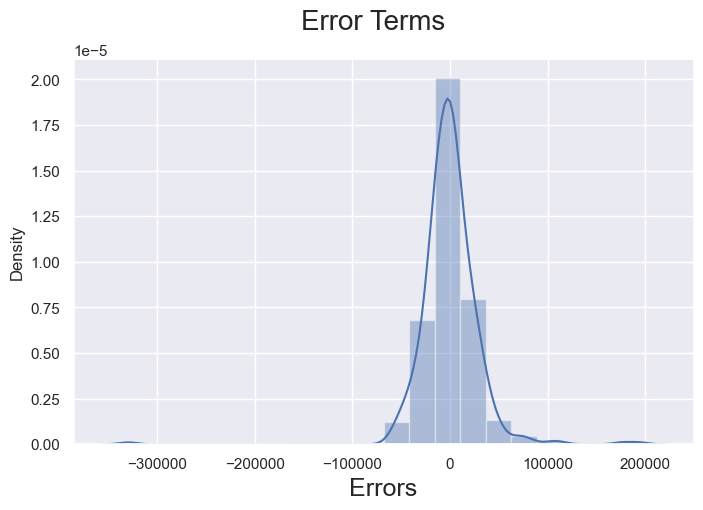

In [898]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [899]:
#evalate model

r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.85

In [900]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

408756994059.8269
933235146.2553126
30548.89762749734


In [901]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

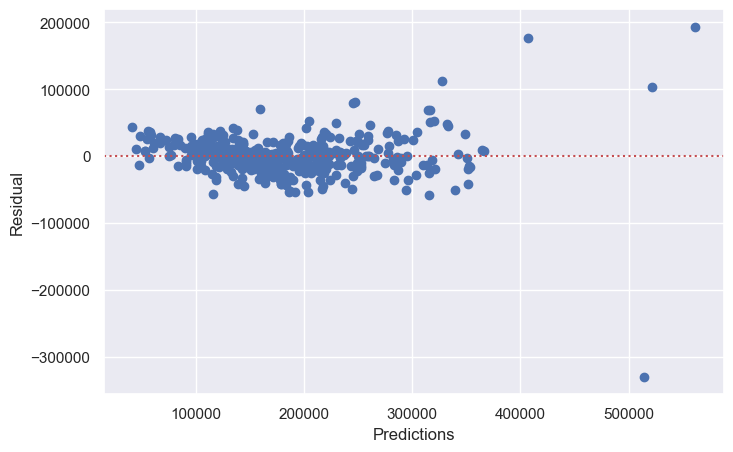

In [910]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

In [911]:
#import libraries for model evalution
from sklearn.metrics import r2_score, mean_squared_error

In [912]:
#r2score,RSS and RMSE
y_pred_train = rfe.predict(X_train)
y_pred_test = rfe.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.869221688166215
0.8083972872200234
358116327535.4514
1239323080749.035
817617186.1539986
1212644893.100817


### Ridge and Lasso Regression

### Ridge

In [917]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [918]:
print(ridge_model_cv.best_params_)

{'alpha': 4.0}


Optimim value of alpha is 4

In [919]:
alpha = 4
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-2.41764295e+04,  1.61804219e+04,  2.43997575e+04,  4.43862384e+04,
        3.16002580e+04,  2.82980537e+04,  1.44850708e+04,  7.18246231e+03,
        1.85079545e+04,  2.51491715e+04,  3.42592975e+04,  3.96242550e+04,
       -3.46145512e+03,  3.94428114e+04,  1.60035201e+04,  9.38279524e+02,
        2.43419050e+04,  7.16103618e+03, -2.52307018e+01, -1.77759308e+04,
        2.49712028e+04,  1.73396019e+04,  2.84554312e+03,  1.14097399e+04,
        4.02333287e+04,  1.76670590e+04, -1.10048840e+04, -1.49338069e+03,
       -2.85227650e+03,  8.26694507e+03,  0.00000000e+00,  2.04340833e+03,
       -1.00696780e+04,  1.21759162e+04, -6.28887041e+02,  8.38858652e+03,
       -6.26725448e+02, -2.04855768e+03,  7.52083747e+03,  3.67822509e+03,
        1.28772438e+04, -9.66162801e+03, -2.80506616e+03, -1.14501331e+03,
        0.00000000e+00, -2.41633304e+03,  1.52534942e+03,  6.71023393e+03,
       -6.36831679e+03,  1.19668166e+04, -2.14808772e+04, -9.68017795e+03,
       -7.60420706e+03,  

In [921]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.892762756977153
0.8285049824629558
293652725041.88745
1109262652826.7537
670440011.5111586
1085384200.4175673


### Lasso

In [922]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [924]:
print(lasso_model_cv.best_params_)

{'alpha': 100}


The optimum value of alpha is 100

In [925]:
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [926]:
lasso.coef_

array([-2.58932592e+04,  2.37172370e+03,  7.38901752e+04,  6.35420116e+04,
        4.77417444e+04,  2.63320071e+04,  0.00000000e+00,  0.00000000e+00,
        7.52276052e+03,  3.63899134e+04,  2.71687632e+03,  3.06453113e+04,
       -0.00000000e+00,  1.26519014e+05,  2.03383190e+04, -0.00000000e+00,
        1.76991884e+04,  1.72648490e+03, -0.00000000e+00, -2.05858282e+04,
        9.14616380e+03,  1.26224024e+04,  0.00000000e+00, -0.00000000e+00,
        5.71152044e+04,  1.25689206e+04, -2.13175071e+04, -0.00000000e+00,
       -0.00000000e+00,  6.33631600e+03,  0.00000000e+00,  0.00000000e+00,
       -1.33397820e+04,  1.00695413e+04, -0.00000000e+00,  6.87323370e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  3.72287731e+03,
        1.08787471e+04, -9.76801549e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.38095804e+04, -1.84822943e+04, -0.00000000e+00,
       -2.46305946e+03,  

In [927]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9007107296092232
0.8363565465614051
271888422303.6261
1058477230919.0654
620749822.6110185
1035692006.7701228


In [928]:
metric2

[0.892762756977153,
 0.8285049824629558,
 293652725041.88745,
 1109262652826.7537,
 25892.8563799199,
 32945.16960675066]

In [929]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.692217e-01,8.927628e-01,9.007107e-01
1,R2 Score (Test),8.083973e-01,8.285050e-01,8.363565e-01
2,RSS (Train),3.581163e+11,2.936527e+11,2.718884e+11
3,RSS (Test),1.239323e+12,1.109263e+12,1.058477e+12
4,MSE (Train),2.859401e+04,2.589286e+04,2.491485e+04
5,MSE (Test),3.482305e+04,3.294517e+04,3.218217e+04


### Model Evaluation

The r2_score of lasso is slightly higher than ridge for the train and test dataset

In [930]:
ridge_pred = ridge.predict(X_test)

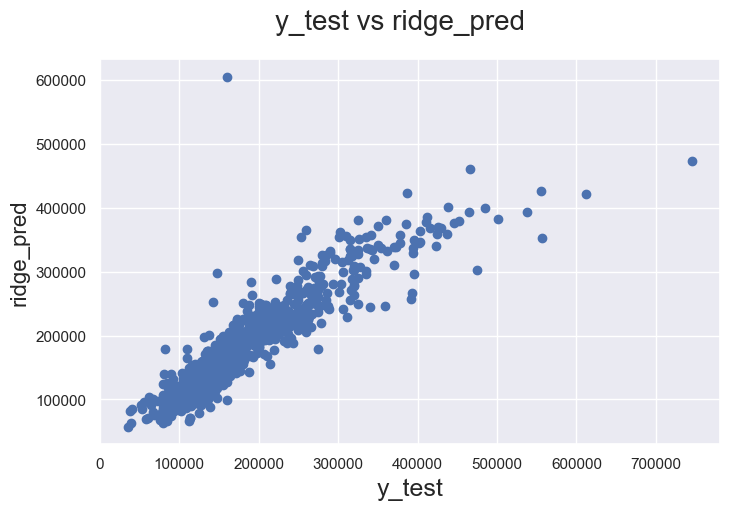

In [931]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

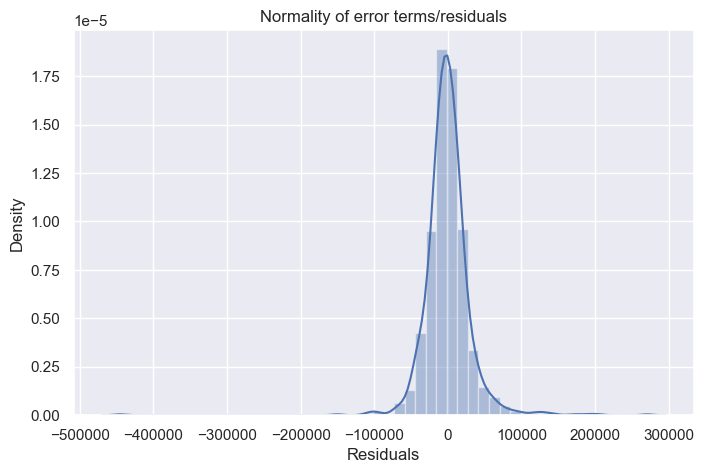

In [932]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

In [933]:
lasso_pred = lasso.predict(X_test)

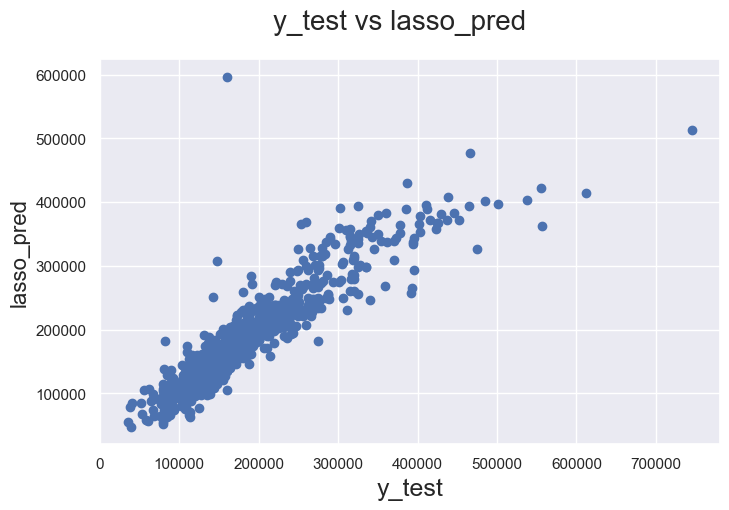

In [934]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

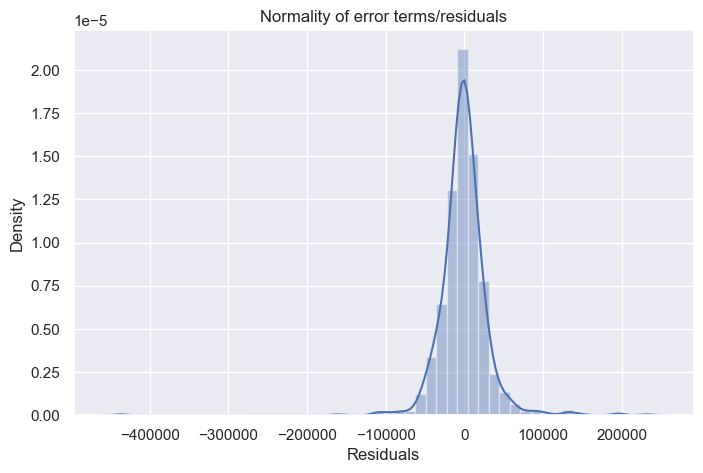

In [935]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

###  changes in the coefficients after regularization

In [936]:
betas = pd.DataFrame(index=X_train.columns)

In [937]:
betas.rows = X_train.columns

In [938]:
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [939]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
MSSubClass,-24176.429475,-25893.259242
LotFrontage,16180.421946,2371.723698
LotArea,24399.757539,73890.175228
OverallQual,44386.238371,63542.011565
OverallCond,31600.258042,47741.744408
MasVnrArea,28298.053744,26332.007103
BsmtFinSF1,14485.070848,0.000000
BsmtFinSF2,7182.462305,0.000000
BsmtUnfSF,18507.954505,7522.760519
TotalBsmtSF,25149.171536,36389.913410


Goal or company wants to know:

1. Which variables are significant in predicting the price of a house,
2. How well those variables describe the price of a house.
3. determine the optimal value of lambda for ridge and lasso regression.

### Which variables are significant in predicting the price of a house?

The below mentioned variables are significant in predicting the price

LotFrontage ------- Linear feet of street connected to property
LotArea------------- Lot size in square feet
OverallQual--------Rates the overall material and finish of the house
OverallCond-------Rates the overall condition of the house
MaxVnrArea ------ Masonry veneer area in square feet
BsmtFinSF1-------Type 1 finished square feet
TotalBsmtSF------Total square feet of basement area
GrLivArea----------Above grade (ground) living area square feet
TotRmsAbvGrd---Total rooms above grade (does not include bathrooms)

### How well those variables describe the price of a house

                    Ridge Regression                Lasso Regression
R2 score(Train)--------- 0.89 ----------------------------0.90

R2 score(Test)-----------0.82-----------------------------0.83

In [940]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.692217e-01,8.927628e-01,9.007107e-01
1,R2 Score (Test),8.083973e-01,8.285050e-01,8.363565e-01
2,RSS (Train),3.581163e+11,2.936527e+11,2.718884e+11
3,RSS (Test),1.239323e+12,1.109263e+12,1.058477e+12
4,MSE (Train),2.859401e+04,2.589286e+04,2.491485e+04
5,MSE (Test),3.482305e+04,3.294517e+04,3.218217e+04


### Problem Statement - Part 2

### Question 1 : 
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

### Answer :

The optimal value of alpha for ridge and lasso regression

Ridge Alpha 4

lasso Alpha 100

### Ridge

In [942]:
#Change the alpha value from 4 to 8
alpha = 8
ridge2 = Ridge(alpha=alpha)
ridge2.fit(X_train, y_train)

Ridge(alpha=8)

In [962]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

#Alpha 4
#R2score(train) 0.892762756977153
#R2score(test)  0.8285049824629558


0.8773897973861292
0.8241224673254787
335749214550.67847
1137609600961.2742
766550718.152234
1113120940.2752194


R2score on training data has decreased but it is almost same on test data

### Lasso

In [945]:
#Changed alpha 100 to 200
alpha =200
lasso200 = Lasso(alpha=alpha)
lasso200.fit(X_train, y_train) 

Lasso(alpha=200)

In [963]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso200.predict(X_train)
y_pred_test = lasso200.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

#R2score at alpha-100
#0.9007107296092232
#0.8363565465614051

0.88811921460748
0.8331858718448046
306368352861.70593
1078985762874.679
699471125.2550364
1055759063.4781594


R2score of training data has decrease and is almost on testing data

In [948]:
#important predictor variables
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso200'] = lasso200.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge2,Ridge,Lasso,Lasso200
MSSubClass,-20081.403555,-24176.429475,-25893.259242,-25151.538420
LotFrontage,15288.049692,16180.421946,2371.723698,0.000000
LotArea,16138.091509,24399.757539,73890.175228,33082.998077
OverallQual,37241.966833,44386.238371,63542.011565,75387.802694
OverallCond,22748.803339,31600.258042,47741.744408,41000.454760
MasVnrArea,25474.006426,28298.053744,26332.007103,24209.407426
BsmtFinSF1,15271.494786,14485.070848,0.000000,0.000000
BsmtFinSF2,6150.138845,7182.462305,0.000000,0.000000
BsmtUnfSF,16485.209672,18507.954505,7522.760519,0.000000
TotalBsmtSF,23984.525935,25149.171536,36389.913410,50461.446016


### Question 2:

You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

### Answer:

The r2_score of lasso is slightly higher than ridge for the test dataset so we will choose lasso regression to solve this problem

### Question 3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [951]:
# Top 5 features are Neighborhood_NoRidge, Neighborhood_NridgHt, 2ndFlrSF, OverallQual, Neighborhood_Veenker

#Drop 5 features
X_train2 = X_train.drop(['LotFrontage','LotArea','OverallQual','BsmtFinSF1','TotalBsmtSF'],axis=1)
X_test2 = X_test.drop(['LotFrontage','LotArea','OverallQual','BsmtFinSF1','TotalBsmtSF'],axis=1)

In [952]:
X_train2.head()

,MSSubClass,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1084,0.235294,0.50,0.0000,0.0,0.045982,0.115329,0.431090,0.0,0.250118,0.000000,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.5,0.871560,0.50,0.388783,0.367561,0.084130,0.0,0.0,0.000000,0.0,0.000000,0.085938,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
112,0.235294,0.50,0.1375,0.0,0.130051,0.328995,0.755342,0.0,0.532798,0.333333,0.0,0.666667,0.5,0.666667,0.0,0.777778,0.5,0.981651,0.75,0.752852,0.140023,0.351816,0.0,0.0,0.538462,0.0,0.000000,0.000000,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
518,0.235294,0.50,0.0000,0.0,0.040873,0.184382,0.488248,0.0,0.320434,0.333333,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.0,0.899083,0.50,0.519011,0.000000,0.068834,0.0,0.0,0.000000,0.0,0.000000,0.070312,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0
297,0.235294,0.50,1.0000,0.0,0.151417,0.218004,0.520833,0.0,0.356772,0.000000,0.0,0.666667,0.5,0.500000,0.0,0.444444,0.5,0.889908,0.50,0.547529,0.000000,0.019120,0.0,0.0,0.634615,0.0,0.000000,0.078125,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
338,0.0

In [953]:
X_test2.head()

,MSSubClass,OverallCond,MasVnrArea,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,0.000000,0.625,0.00000,0.0,0.115188,0.177874,0.000000,0.0,0.100519,0.000000,0.0,0.333333,0.0,0.5,0.0,0.222222,0.0,0.678899,0.50,0.501901,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.281250,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1
57,0.235294,0.500,0.00000,0.0,0.399443,0.176428,0.459402,0.0,0.302501,0.000000,0.0,0.666667,0.5,0.5,0.0,0.444444,0.0,0.954128,0.50,0.537072,0.000000,0.133843,0.0,0.0,0.0,0.0,0.0,0.015625,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
780,0.000000,0.500,0.02375,0.0,0.574547,0.318510,0.000000,0.0,0.192308,0.000000,0.0,0.666667,0.0,0.5,0.0,0.333333,0.5,0.871560,0.50,0.382129,0.256709,0.040153,0.0,0.0,0.0,0.0,0.0,0.093750,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
382,0.235294,0.500,0.00000,0.0,0.436136,0.204989,0.458333,0.0,0.320670,0.000000,0.0,0.666667,0.5,0.5,0.0,0.555556,0.0,0.972477,0.50,0.607414,0.168028,0.101338,0.0,0.0,0.0,0.0,0.0,0.007812,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
1170,0.352941,0.625,0.00000,0.0,0.266605,0.269704,0.000000,0

### Lasso

In [954]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train2, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [955]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [956]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train2, y_train) 

Lasso(alpha=100)

In [957]:
lasso.coef_

array([-2.65546423e+04,  5.25814821e+04,  3.10839856e+04,  2.43674156e+03,
        1.90979999e+04,  2.85909584e+04,  2.62279551e+04, -0.00000000e+00,
        1.54938004e+05,  2.80803364e+04, -0.00000000e+00,  1.87946597e+04,
        0.00000000e+00, -0.00000000e+00, -2.81187656e+04,  5.25987852e+03,
        1.59077703e+04, -0.00000000e+00, -0.00000000e+00,  6.05050175e+04,
        1.14287501e+04, -1.97488405e+04, -0.00000000e+00, -0.00000000e+00,
        5.61733722e+03,  0.00000000e+00,  0.00000000e+00, -1.94978868e+04,
        1.06071288e+04, -0.00000000e+00,  9.15879985e+03, -0.00000000e+00,
        0.00000000e+00,  8.82535189e+03,  3.29573547e+03,  1.18467142e+04,
       -6.22271803e+03, -0.00000000e+00,  2.47310479e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.16439234e+03,  0.00000000e+00,
        1.36108618e+04, -2.06878157e+04, -0.00000000e+00, -2.70359472e+03,
        0.00000000e+00, -7.09332714e+03, -1.05254358e+04,  1.89653606e+03,
       -0.00000000e+00,  

In [959]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train2)
y_pred_test = lasso.predict(X_test2)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8955234687088478
0.824239702410964
286092939838.3966
1136851301951.79
653180227.9415448
1112378964.727779


R2score of training and testing data has decreased

In [960]:
#important predictor variables
betas = pd.DataFrame(index=X_train2.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Lasso
MSSubClass,-26554.642289
OverallCond,52581.482102
MasVnrArea,31083.985576
BsmtFinSF2,2436.741564
BsmtUnfSF,19097.999853
1stFlrSF,28590.958398
2ndFlrSF,26227.955132
LowQualFinSF,-0.000000
GrLivArea,154938.004310
BsmtFullBath,28080.336413


### five most important predictor variables now: 

1. GrLivArea
2. OverallCond
3. MasVnrArea
4. 1stFlrSF
5. 2ndFlrSF

### Question 4:

How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

### Answer:

To make model robust and generalisable 3 features are required:

1. Model accuracy should be > 70-75%: We have got 90%(Train) and 83%(Test), through Lasso Regression. 
2. P-value of all the features is < 0.05 
3. VIF of all the features are < 5 
4. The test accuracy is not lesser than the training score
5. The model should be accurate for datasets other than the ones which were used during training.

Our model satisfies all these conditions. Thus, the model is robust and generalisable.